ESG vs Stock performance in the Industrial Sector.

##Objective
To evaluate whether higher ESG scores are associated with better performance in the Industrials sector. This project aims to uncover if sustainable companies deliver better returns by analyzing ESG ratings from multiple agencies and comparing them against 1-year price change data.

##step 2: Data cleaning & Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ipywidgets

In [1]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd

# Set up the Tkinter root window and hide it
root = tk.Tk()
root.withdraw()  # This hides the root window

# Open the file dialog box
file_path = filedialog.askopenfilename(title="Select your data file", filetypes=[("CSV Files", "*.csv")])

# Load the data using Pandas
data = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
data.head()


,Unique_id,Symbol,Company_name,Exchange,gicSector,gicSubindustry,Company_ESG_pulse,ESG_beta,SNP,Sustainalytics,...,52w_change price,52w_change price percent,52w_average volume,Name,Sector,Industry,isin,cusip,Securities_type,Currency_code
0,190179,MMM,3M Company,New York Stock Exchange,Industrials,Industrial Conglomerates,-0.083992,0.010832,67.0,32.2,...,-11.290,-10.83,1648276.0,3M Company Common Stock,Health Care,Medical/Dental Instruments,US88579Y1010,88579Y101,Common Stock,USD
1,205868,JOBS,"51job, Inc",Nasdaq,Industrials,Human Resource & Employment Services,0.776978,-0.203820,89.0,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,US3168271043,316827104,Common Stock,USD
2,191323,AOS,A. O. Smith Corporation,New York Stock Exchange,Industrials,Building Products,0.251170,0.159637,17.0,25.5,...,19.470,29.49,452457.0,A.O. Smith Corporation Common Stock,Industrials,Industrial Machinery/Components,US8318652091,831865209,Common Stock,USD
3,206373,AAON,"AAON, Inc",Nasdaq,Industrials,Building Products,0.739143,NaN,29.0,NaN,...,-10.145,-10.51,157665.0,NaN,NaN,NaN,US0003602069,000360206,Common Stock,USD
4,190905,AIR,AAR Corp,New York Stock Exchange,Industrials,Aerospace & Defense,0.588800,NaN,NaN,NaN,...,6.670,12.26,74456.0,AAR Corp. Common Stock,Industrials,Aerospace,US0003611052,000361105,Common Stock,USD


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unique_id                  705 non-null    int64  
 1   Symbol                     704 non-null    object 
 2   Company_name               705 non-null    object 
 3   Exchange                   705 non-null    object 
 4   gicSector                  705 non-null    object 
 5   gicSubindustry             690 non-null    object 
 6   Company_ESG_pulse          705 non-null    float64
 7   ESG_beta                   146 non-null    float64
 8   SNP                        321 non-null    float64
 9   Sustainalytics             150 non-null    float64
 10  MSCI                       130 non-null    object 
 11  SNP_normalized             145 non-null    float64
 12  Sustainalytics_normalized  150 non-null    float64
 13  MSCI_normalized            130 non-null    float64

In [3]:
selected_cols = [
    'Company_name',
    'Country',
    'Sector',
    'Industry',
    'Company_ESG_pulse',
    'SNP_normalized',
    'Sustainalytics_normalized',
    'MSCI_normalized',
    '52w_change price percent'
]

df = data[selected_cols]
df.head()


,Company_name,Country,Sector,Industry,Company_ESG_pulse,SNP_normalized,Sustainalytics_normalized,MSCI_normalized,52w_change price percent
0,3M Company,United States,Health Care,Medical/Dental Instruments,-0.083992,67.0,80.50,99.96,-10.83
1,"51job, Inc",NaN,NaN,NaN,0.776978,89.0,38.00,85.68,NaN
2,A. O. Smith Corporation,United States,Industrials,Industrial Machinery/Components,0.251170,17.0,63.75,NaN,29.49
3,"AAON, Inc",NaN,NaN,NaN,0.739143,NaN,NaN,NaN,-10.51
4,AAR Corp,United States,Industrials,Aerospace,0.588800,NaN,NaN,NaN,12.26


In [ ]:
In this step, we selected only the key colomns from the original dataset that are essential for our analysis.

In [4]:
# Step 1: new column for average ESG score
df['ESG_Average_Score'] = df[['SNP_normalized', 'Sustainalytics_normalized', 'MSCI_normalized']].mean(axis=1)

# Step 2: Dropping rows where ESG_Average_Score or stock performance is missing
df_cleaned = df.dropna(subset=['ESG_Average_Score', '52w_change price percent'])

# Optional: Reset index after cleaning
df_cleaned = df_cleaned.reset_index(drop=True)

# Preview cleaned data
df_cleaned.head()


C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_23708\1088045104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ESG_Average_Score'] = df[['SNP_normalized', 'Sustainalytics_normalized', 'MSCI_normalized']].mean(axis=1)


,Company_name,Country,Sector,Industry,Company_ESG_pulse,SNP_normalized,Sustainalytics_normalized,MSCI_normalized,52w_change price percent,ESG_Average_Score
0,3M Company,United States,Health Care,Medical/Dental Instruments,-0.083992,67.0,80.50,99.96,-10.83,82.486667
1,A. O. Smith Corporation,United States,Industrials,Industrial Machinery/Components,0.251170,17.0,63.75,NaN,29.49,40.375000
2,"AMETEK, Inc",United States,Industrials,Industrial Machinery/Components,0.786728,25.0,65.00,28.56,29.47,39.520000
3,AerCap Holdings N.V,Netherlands,Consumer Discretionary,Diversified Commercial Services,-0.085167,19.0,80.75,85.68,50.41,61.810000
4,"Alaska Air Group, Inc",United States,Consumer Discretionary,Air Freight/Delivery Services,0.375652,47.0,66.25,NaN,-0.10,56.625000


##step3: ESG Score Distribution

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


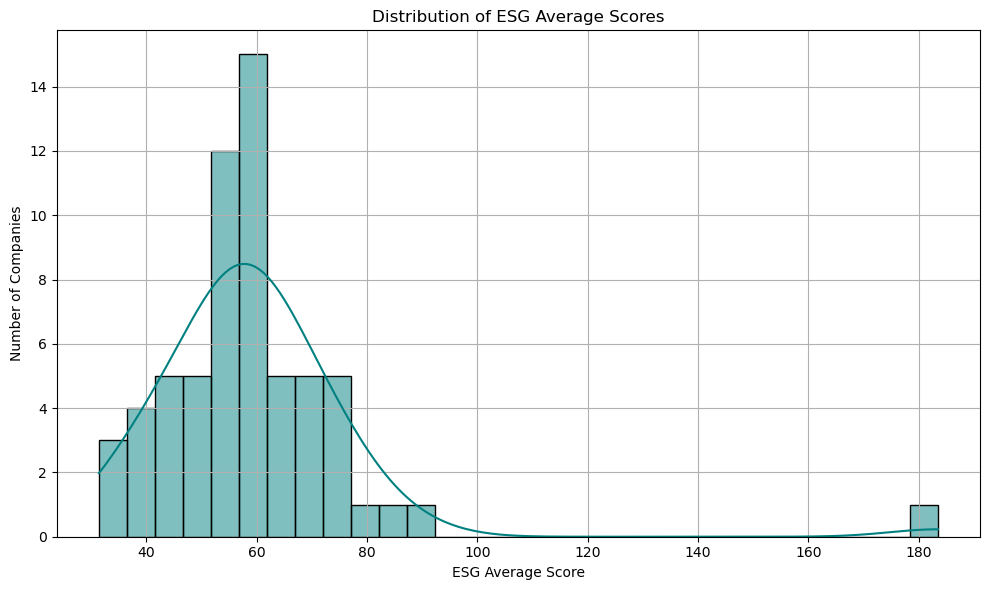

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['ESG_Average_Score'], bins=30, kde=True, color='teal')
plt.title('Distribution of ESG Average Scores')
plt.xlabel('ESG Average Score')
plt.ylabel('Number of Companies')
plt.grid(True)
plt.tight_layout()
plt.show()


ESG vs Stock Performance (correlation & Scatter Plot)

Correlation between ESG Average Score and 1Y Stock Performance: 0.03


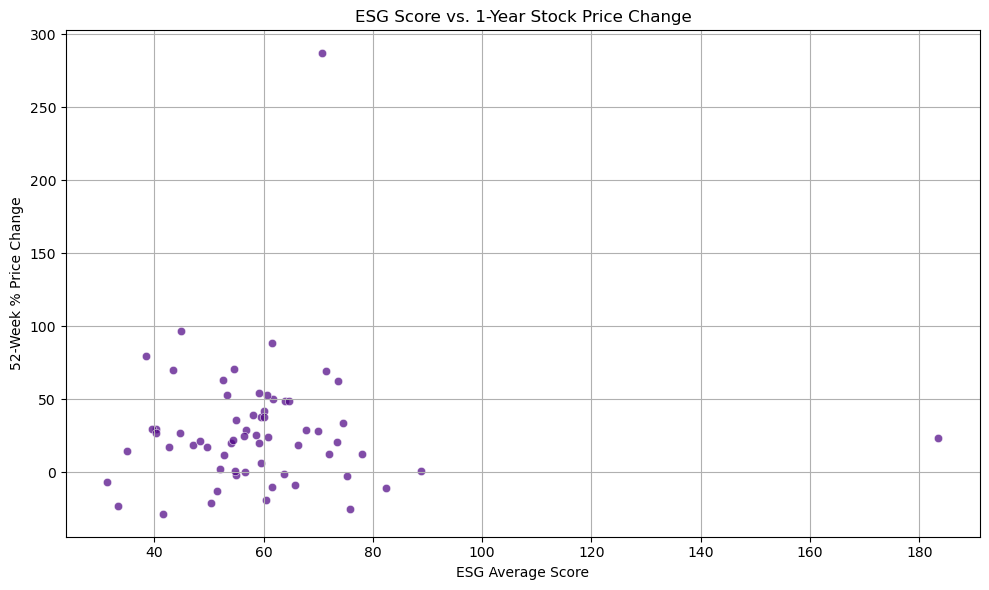

In [9]:
# Drop rows with missing values in ESG_Average_Score or 52w_change price percent
esg_perf_df = df_cleaned[['ESG_Average_Score', '52w_change price percent']].dropna()

# Correlation
correlation = esg_perf_df.corr().iloc[0, 1]
print(f"Correlation between ESG Average Score and 1Y Stock Performance: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=esg_perf_df,
    x='ESG_Average_Score',
    y='52w_change price percent',
    alpha=0.7,
    color='indigo'
)
plt.title('ESG Score vs. 1-Year Stock Price Change')
plt.xlabel('ESG Average Score')
plt.ylabel('52-Week % Price Change')
plt.grid(True)
plt.tight_layout()
plt.show()


ESG Scores dont strongly predict stock price changes over a 1-year period.
It suggests ESG Performance alone isnt reliable short-term indicator of returns in the industrials sector.

Boxplot Of ESG by sector.

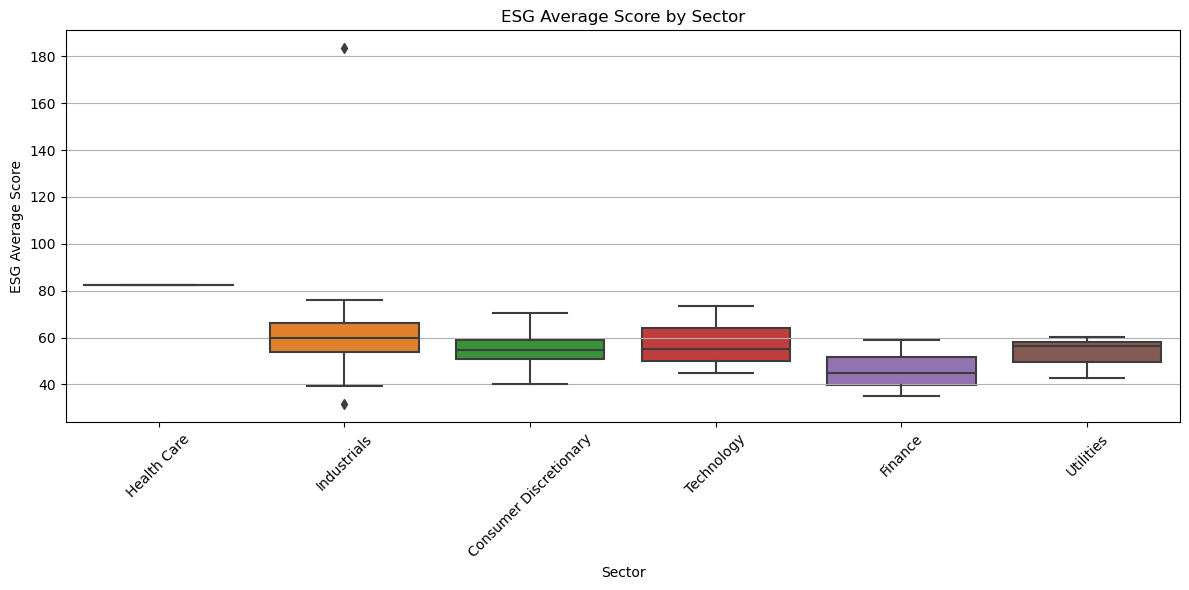

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='Sector', y='ESG_Average_Score')
plt.xticks(rotation=45)
plt.title('ESG Average Score by Sector')
plt.xlabel('Sector')
plt.ylabel('ESG Average Score')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


Regression model

Mean Squared Error: 6271.740368298521
R-squared: -0.10320616583921494


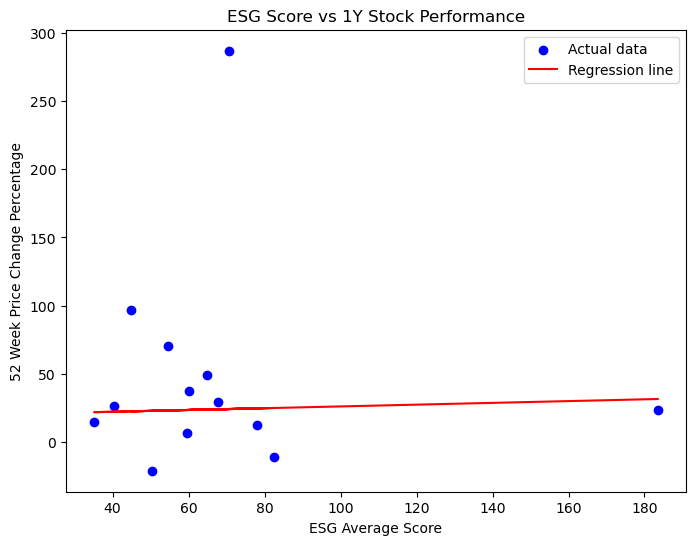

In [11]:
# Step 1: Prepare the data by selecting columns and handling missing values
df_regression = df_cleaned[['ESG_Average_Score', '52w_change price percent']].dropna()

# Step 2: Define Features (X) and Target (y)
X = df_regression[['ESG_Average_Score']]
y = df_regression['52w_change price percent']

# Step 3: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optional: Visualize the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Regression line')
plt.title('ESG Score vs 1Y Stock Performance')
plt.xlabel('ESG Average Score')
plt.ylabel('52 Week Price Change Percentage')
plt.legend()
plt.show()


Mean Squared Error(MSE): is high, indicating that the models predictions are quite inaccurate.
R-Squared Value is negative, which is a strong indication that the regression model is not effectively explaning the relationship between ESG scores and 1-year stock performance.